## Loading the Libraries and Data


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:

df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Cleaning
## Handle Missing Values

In [3]:
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
# Unique non-null values in person_emp_length
unique_emp_length = df['person_emp_length'].dropna().unique()

# Unique non-null values in loan_int_rate
unique_int_rate = df['loan_int_rate'].dropna().unique()

print("Unique values in person_emp_length:", unique_emp_length)
print("Unique values in loan_int_rate:", unique_int_rate)

Unique values in person_emp_length: [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  11.  18.
  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.  25.
  27.  28.  31.  41.  34.  29.  38.  30.]
Unique values in loan_int_rate: [16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89 17.99
 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58 15.7
 15.99 14.84 14.42  6.99 13.61  9.91 13.48 12.98 13.57 15.68 13.06 15.62
 11.71  8.88 12.18 13.99  5.42 12.73 11.49 19.91 11.83 14.59  9.64 16.35
 18.67 10.08 10.36 12.23 16.07 14.22 14.79 13.22 11.86 13.43 15.28 17.93
  9.25 10.62 18.43 11.36 15.65 13.04 17.04 14.83 14.65 16.82 10.25 14.96
 11.99  8.49  6.17 16.32 14.35 15.21 14.09 17.49 13.92 16.49  5.79 13.11
  6.54 12.53 15.95 10.74 15.27 14.72 13.35  7.68 14.46 13.47  6.03 12.92
 18.64 16.7  18.3  

In [5]:
# Step 1: Add missing value flags (for ML models to learn missing-ness as a feature)
df['emp_length_missing'] = df['person_emp_length'].isnull().astype(int)
df['int_rate_missing'] = df['loan_int_rate'].isnull().astype(int)

# Step 2: Impute `person_emp_length` (Ordinal Feature)
# Use -1 to retain information that it's not a known valid employment length
df['person_emp_length'] = df['person_emp_length'].fillna(-1)

# Step 3: Impute `loan_int_rate` (Numerical Feature)
# Use median to avoid outliers and maintain central tendency
median_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'] = df['loan_int_rate'].fillna(median_int_rate)

In [6]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
emp_length_missing            0
int_rate_missing              0
dtype: int64

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,int_rate_missing
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0


In [8]:

df.shape

(32581, 14)

## Check is there any Data Inconsistency or Inappropriate values


In [9]:
# Numerical columns
num_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Check for negative or zero values (where not allowed)
for col in num_cols:
    print(f"\n--- Checking {col} ---")
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("Unique values (sample):", df[col].unique()[:10])

    # Highlight rows with negative values
    if (df[col] < 0).any():
        print(f"⚠️ Warning: Negative values found in {col}!")



--- Checking person_age ---
Min: 20
Max: 144
Unique values (sample): [ 22  21  25  23  24  26 144 123  20  32]

--- Checking person_income ---
Min: 4000
Max: 6000000
Unique values (sample): [59000  9600 65500 54400  9900 77100 78956 83000 10000 85000]

--- Checking person_emp_length ---
Min: -1.0
Max: 123.0
Unique values (sample): [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.]
⚠️ Warning: Negative values found in person_emp_length!

--- Checking loan_amnt ---
Min: 500
Max: 35000
Unique values (sample): [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000]

--- Checking loan_int_rate ---
Min: 5.42
Max: 23.22
Unique values (sample): [16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74]

--- Checking loan_percent_income ---
Min: 0.0
Max: 0.83
Unique values (sample): [0.59 0.1  0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16]

--- Checking cb_person_cred_hist_length ---
Min: 2
Max: 30
Unique values (sample): [ 3  2  4  8  7  6  9 10  5 11]


In [10]:
# Categorical columns
cat_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status',
    'cb_person_default_on_file'
]

for col in cat_cols:
    print(f"\n--- Unique values in {col} ---")
    print(df[col].value_counts(dropna=False))



--- Unique values in person_home_ownership ---
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

--- Unique values in loan_intent ---
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

--- Unique values in loan_grade ---
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

--- Unique values in loan_status ---
loan_status
0    25473
1     7108
Name: count, dtype: int64

--- Unique values in cb_person_default_on_file ---
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [11]:
# Check missing flags or binary columns
bin_cols = ['cb_person_default_on_file', 'loan_status', 'emp_length_missing', 'int_rate_missing']

for col in bin_cols:
    print(f"\n--- Checking binary values in {col} ---")
    print(df[col].unique())
    if not set(df[col].unique()).issubset({0, 1, 'Y', 'N'}):
        print(f"⚠️ Warning: Unexpected values found in {col}!")



--- Checking binary values in cb_person_default_on_file ---
['Y' 'N']

--- Checking binary values in loan_status ---
[1 0]

--- Checking binary values in emp_length_missing ---
[0 1]

--- Checking binary values in int_rate_missing ---
[0 1]


## Correct Data Types

In [12]:
df.dtypes


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
emp_length_missing              int64
int_rate_missing                int64
dtype: object

## Check for Duplicates


In [13]:
df.duplicated().sum()


np.int64(165)

In [14]:
# Step 1: Remove duplicate rows
df = df.drop_duplicates()

# Step 2 (Optional): Reset index
df.reset_index(drop=True, inplace=True)


In [15]:
df.duplicated().sum()

np.int64(0)

## Outlier Handling

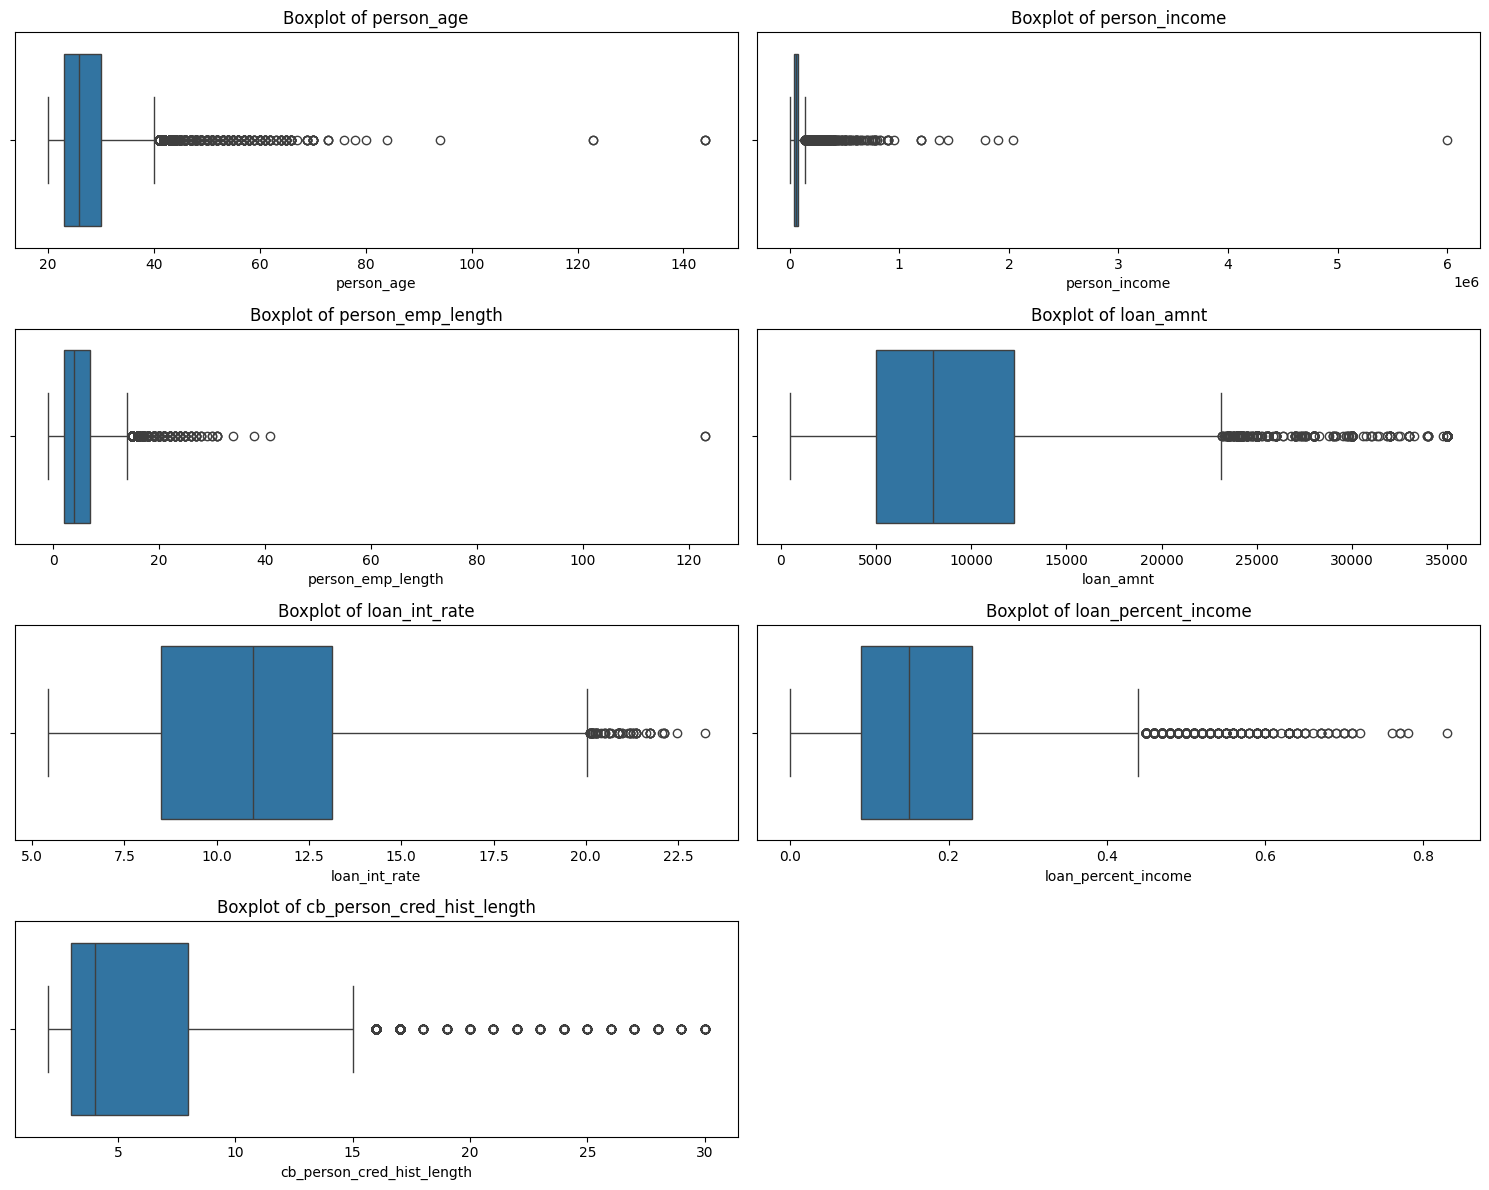

In [16]:
# List of numerical columns
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Plot boxplots for each
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [17]:
# IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\n📌 {col} has {outliers.shape[0]} outliers")



📌 person_age has 1491 outliers

📌 person_income has 1478 outliers

📌 person_emp_length has 852 outliers

📌 loan_amnt has 1679 outliers

📌 loan_int_rate has 70 outliers

📌 loan_percent_income has 650 outliers

📌 cb_person_cred_hist_length has 1139 outliers


In [18]:
# Summary stats for numerical features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.632064,4.196098,-1.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00
emp_length_missing,32416.0,0.027363,0.163141,0.00,0.00,0.00,0.00,1.00
int_rate_missing,32416.0,0.095478,0.293878,0.00,0.00,0.00,0.00,1.00


In [19]:
# Summary for object columns (categorical)
df.describe(include='object').T


,count,unique,top,freq
person_home_ownership,32416,4,RENT,16378
loan_intent,32416,6,EDUCATION,6411
loan_grade,32416,7,A,10703
cb_person_default_on_file,32416,2,N,26686


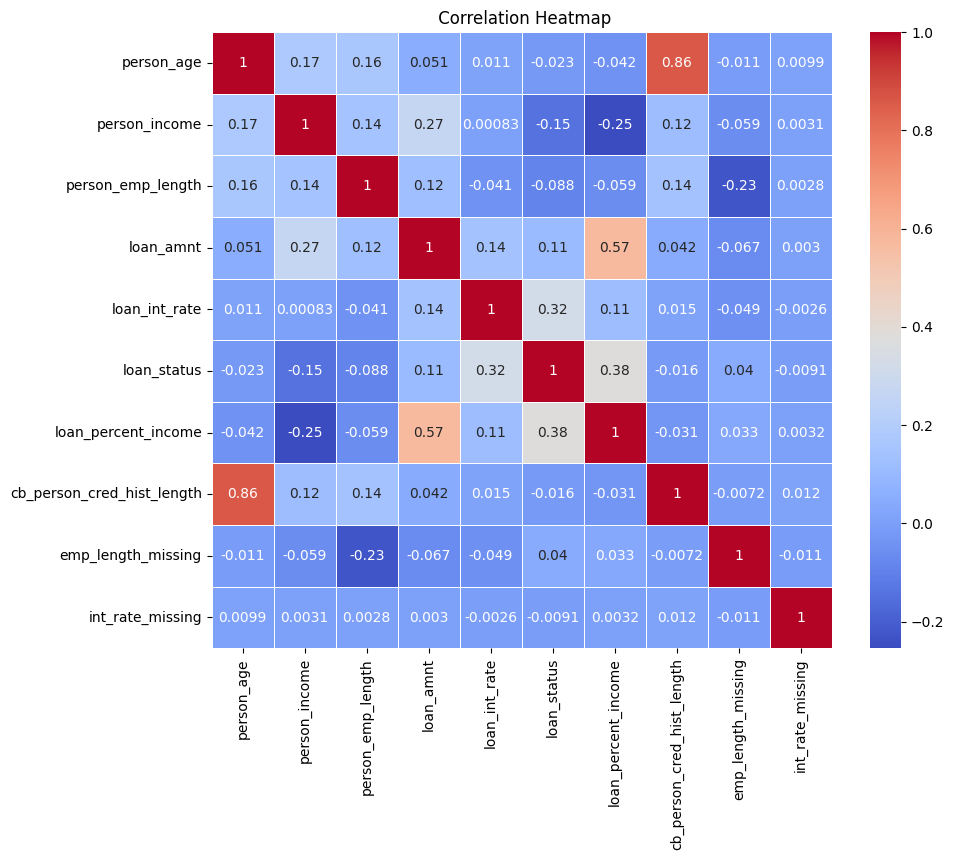

In [20]:
# Compute correlation matrix (only for numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(" Correlation Heatmap")
plt.show()

In [21]:
df.head(3)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,int_rate_missing
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,0


In [22]:
def clip_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Apply clipping to all affected features
cols_with_outliers = [
    'person_age', 'person_income', 'person_emp_length', 
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
    'cb_person_cred_hist_length'
]

for col in cols_with_outliers:
    clip_outliers(df, col)


In [23]:
df[cols_with_outliers].describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.451922,5.274139,20.00,23.00,26.00,30.00,40.50
person_income,32416.0,62437.029831,31807.394422,4000.00,38542.00,55000.00,79218.00,140232.00
person_emp_length,32416.0,4.545903,3.832216,-1.00,2.00,4.00,7.00,14.50
loan_amnt,32416.0,9418.433027,5828.477669,500.00,5000.00,8000.00,12250.00,23125.00
loan_int_rate,32416.0,11.012830,3.077268,5.42,8.49,10.99,13.11,20.04
loan_percent_income,32416.0,0.168854,0.102395,0.00,0.09,0.15,0.23,0.44
cb_person_cred_hist_length,32416.0,5.712441,3.713420,2.00,3.00,4.00,8.00,15.50


# Exploratory Data Analysis
## Univariate Analysis

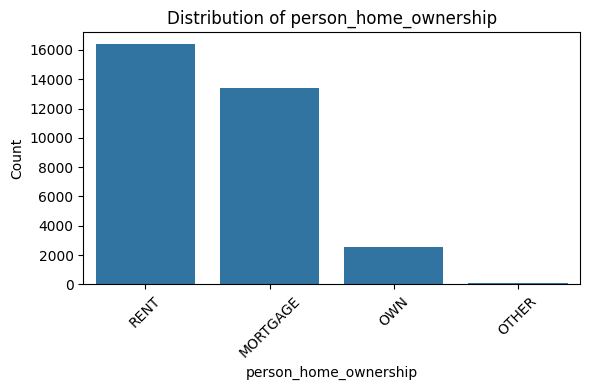

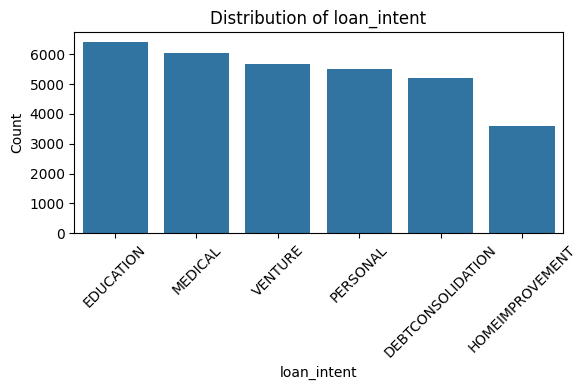

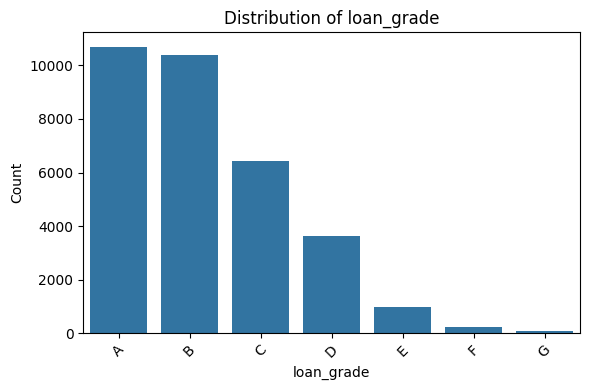

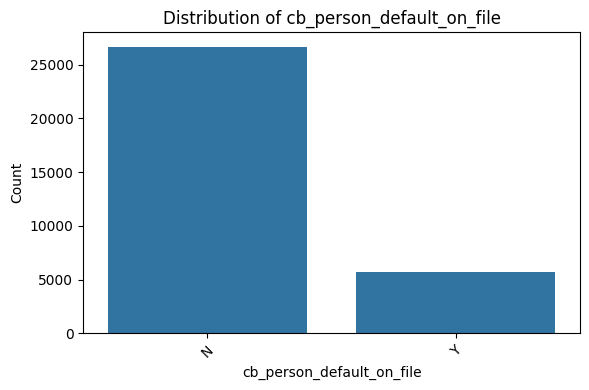

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Plot countplots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


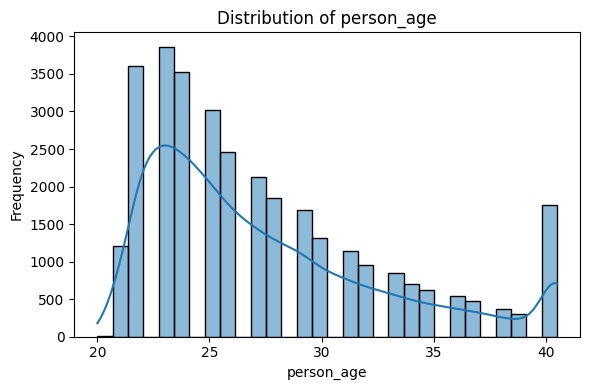

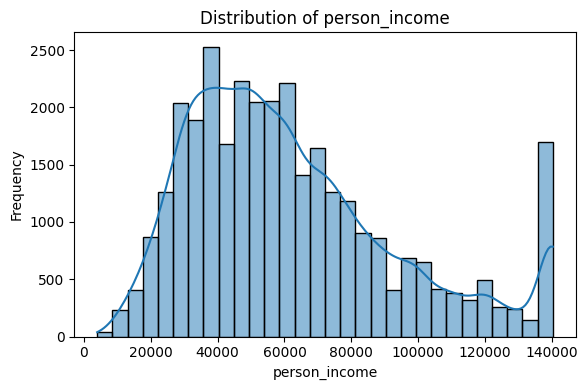

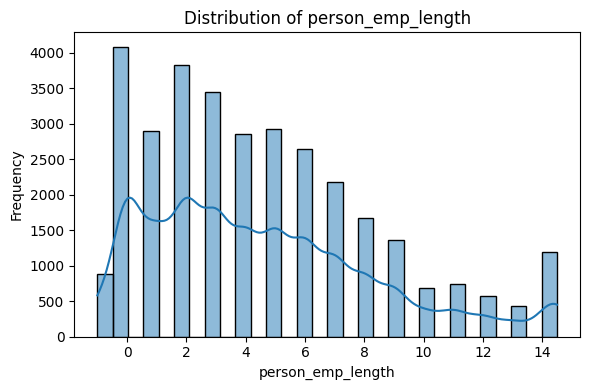

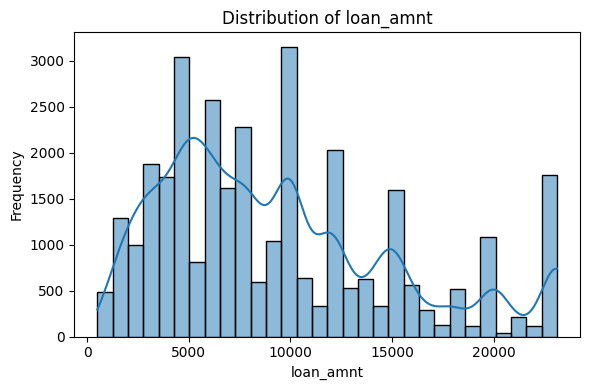

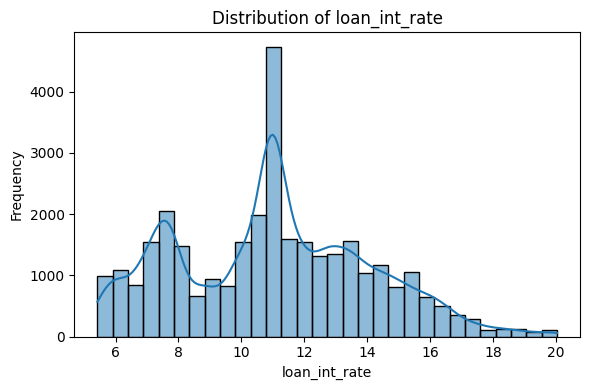

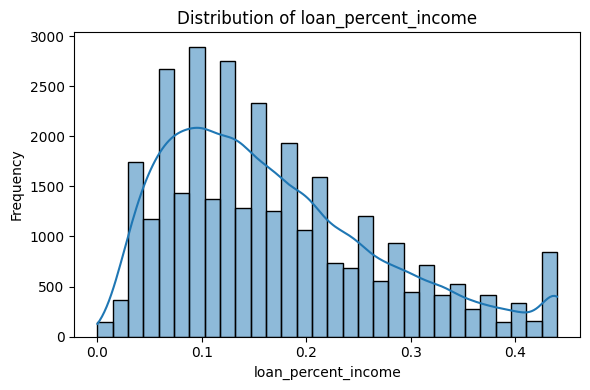

In [25]:
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## Bivariate Analysis

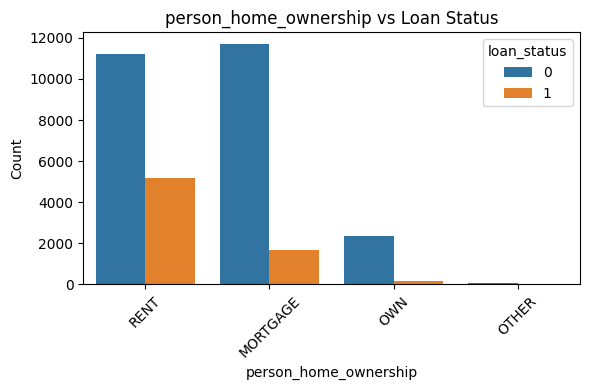

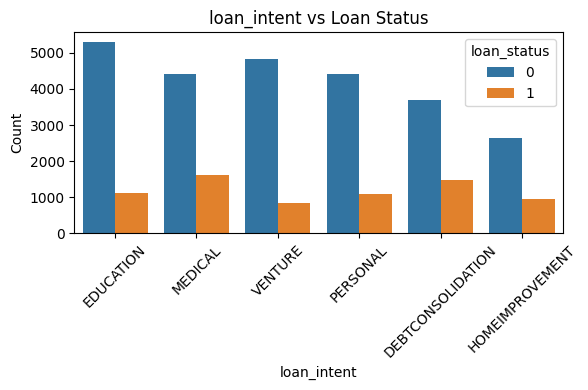

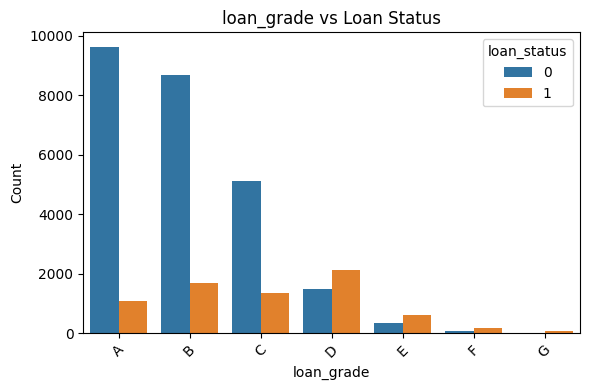

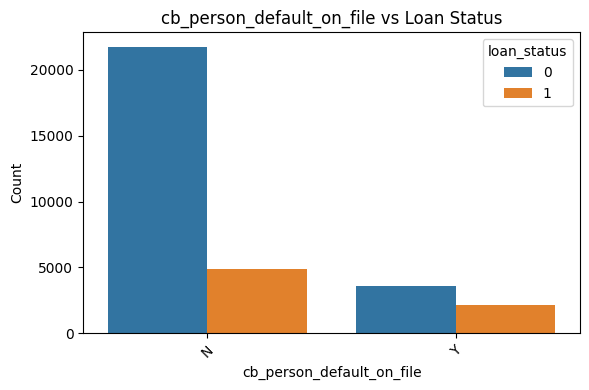

In [26]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='loan_status', order=df[col].value_counts().index)
    plt.title(f'{col} vs Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


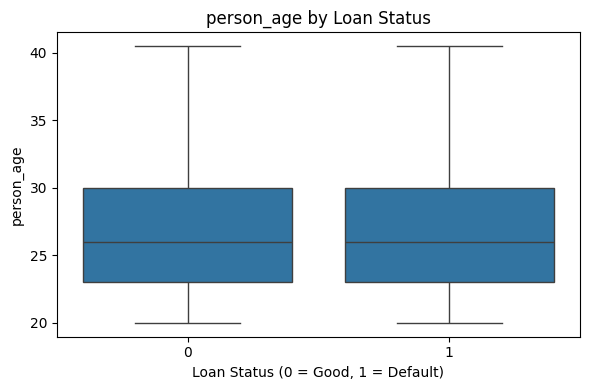

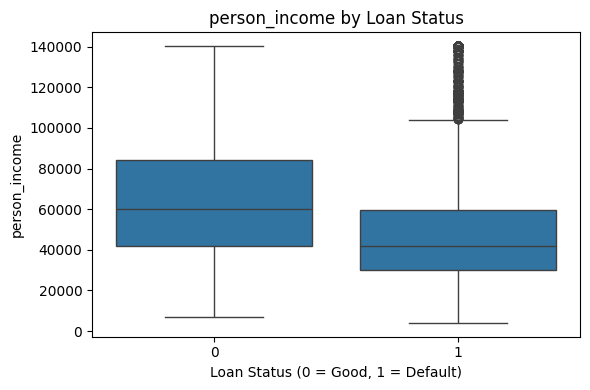

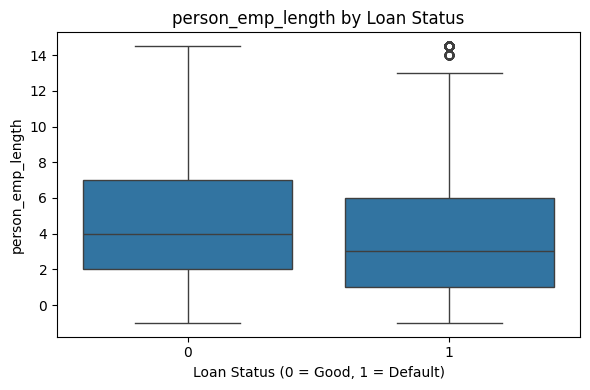

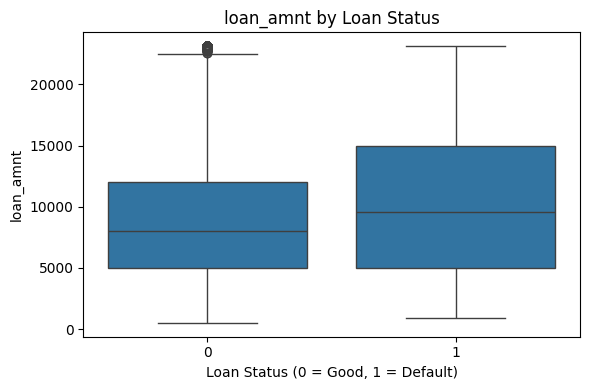

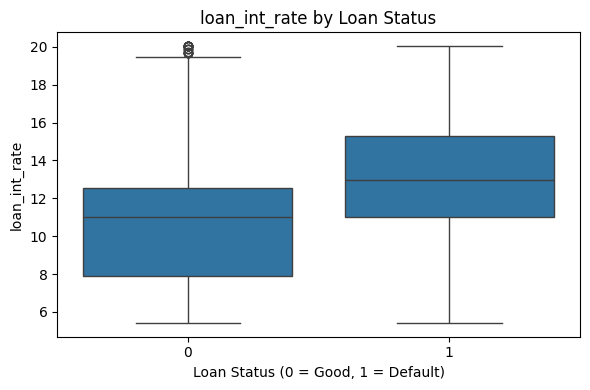

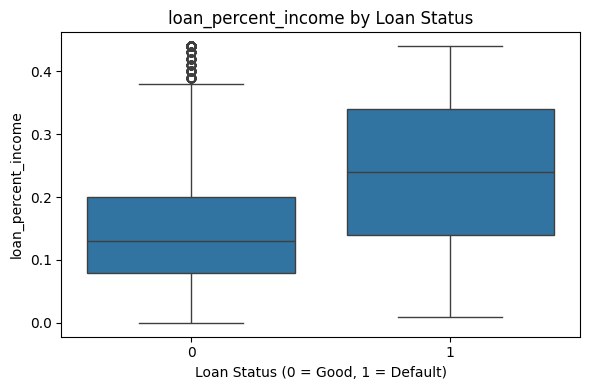

In [27]:
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Loan Status (0 = Good, 1 = Default)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [28]:
# Generate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display matrix
corr_matrix


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,emp_length_missing,int_rate_missing
person_age,1.000000,0.127625,0.155244,0.054756,0.012223,-0.027306,-0.046266,0.875877,-0.010285,0.006833
person_income,0.127625,1.000000,0.221617,0.414601,-0.017324,-0.246134,-0.370599,0.096968,-0.103584,0.002745
person_emp_length,0.155244,0.221617,1.000000,0.125344,-0.043902,-0.095960,-0.064575,0.129206,-0.242737,0.003902
loan_amnt,0.054756,0.414601,0.125344,1.000000,0.136155,0.104994,0.595664,0.042231,-0.069950,0.001813
loan_int_rate,0.012223,-0.017324,-0.043902,0.136155,1.000000,0.319808,0.117730,0.015409,-0.049200,-0.002410
loan_status,-0.027306,-0.246134,-0.095960,0.104994,0.319808,1.000000,0.378183,-0.019917,0.039810,-0.009102
loan_percent_income,-0.046266,-0.370599,-0.064575,0.595664,0.117730,0.378183,1.000000,-0.032069,0.032496,0.003779
cb_person_cred_hist_length,0.875877,0.096968,0.129206,0.042231,0.015409,-0.019917,-0.032069,1.000000,-0.005649,0.011307
emp_length_missing,-0.010285,-0.103584,-0.242737,-0.069950,-0.049200,0.039810,0.032496,-0.005649,1.000000,-0.011382
int_rate_missing,0.006833,0.002745,0.003902,0.001813,-0.002410,-0.009102,0.003779,0.011307,-0.011382,1.000000


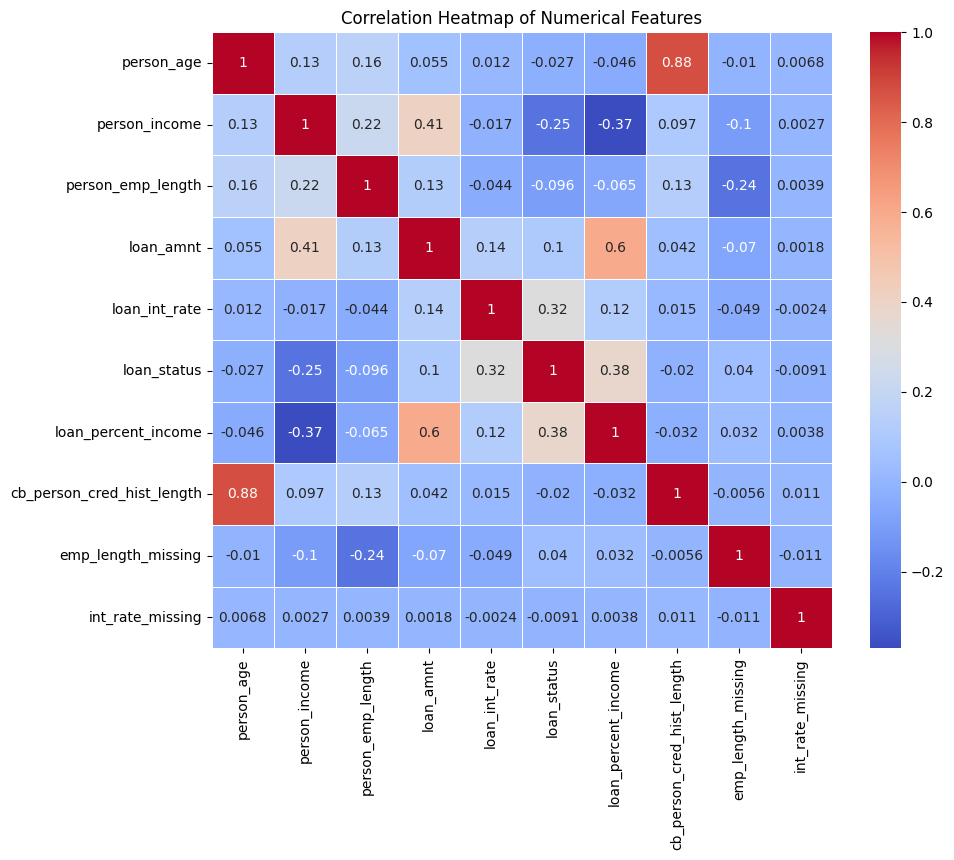

In [29]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [30]:
# Sort correlation with target variable
target_corr = corr_matrix['loan_status'].sort_values(ascending=False)
print("🔍 Features most correlated with loan_status:\n")
print(target_corr)


🔍 Features most correlated with loan_status:

loan_status                   1.000000
loan_percent_income           0.378183
loan_int_rate                 0.319808
loan_amnt                     0.104994
emp_length_missing            0.039810
int_rate_missing             -0.009102
cb_person_cred_hist_length   -0.019917
person_age                   -0.027306
person_emp_length            -0.095960
person_income                -0.246134
Name: loan_status, dtype: float64


# Feature Engineering


In [31]:
df['loan_percent_income'] = df['loan_amnt'] / df['person_income']


In [32]:
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade_num'] = df['loan_grade'].map(grade_map)


In [33]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})


In [34]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()


In [35]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


In [36]:
df['income_times_employment'] = df['person_income'] * df['person_emp_length']


In [37]:
df.drop(columns=['loan_grade'], inplace=True)


# Modeling Pipeline
## ✅ Step 1: Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [43]:
# Split data
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ✅ Step 2: Model Training

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


## ✅ Step 3: Model Evaluation

In [46]:
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    
    # Use scaled data only for Logistic Regression
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




🔍 Model: Logistic Regression
Confusion Matrix:
[[4803  263]
 [ 679  739]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5066
           1       0.74      0.52      0.61      1418

    accuracy                           0.85      6484
   macro avg       0.81      0.73      0.76      6484
weighted avg       0.85      0.85      0.85      6484


🔍 Model: Random Forest
Confusion Matrix:
[[5031   35]
 [ 400 1018]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.97      0.72      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.95      0.86      0.89      6484
weighted avg       0.94      0.93      0.93      6484


🔍 Model: XGBoost
Confusion Matrix:
[[5026   40]
 [ 368 1050]]

Classification Report:
              precision    recall  f1-score   support

           0

# ⚙️ Step-by-Step Hyperparameter Tuning (RandomizedSearchCV)
## 🔹 Step 1: Import Libraries

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


## 🔹 Step 2: Define Parameter Grid

In [48]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


## 🔹 Step 3: Set Up RandomizedSearchCV

In [49]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,                # Number of combinations to try
    scoring='f1',             # Focus on F1-score for imbalance
    cv=3,                     # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1                 # Use all available cores
)


## 🔹 Step 4: Fit the Model on Training Data

In [50]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

## 🔹 Step 5: Check Best Parameters & Evaluate

In [51]:
print("✅ Best Parameters Found:\n", random_search.best_params_)

# Predict using best estimator
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation
print("\n📈 Classification Report (Tuned XGBoost):\n")
print(classification_report(y_test, y_pred_best))


✅ Best Parameters Found:
 {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}

📈 Classification Report (Tuned XGBoost):

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.97      0.73      0.83      1418

    accuracy                           0.94      6484
   macro avg       0.95      0.86      0.90      6484
weighted avg       0.94      0.94      0.93      6484



🔍 ROC AUC Score: 0.9482


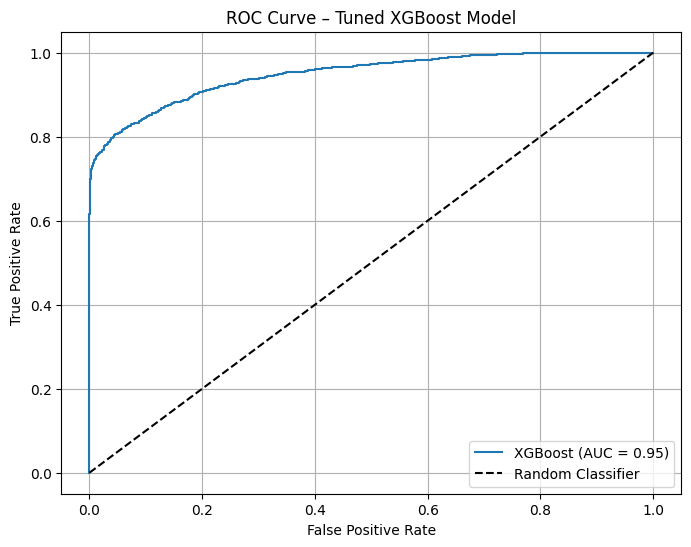

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (defaulter)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"🔍 ROC AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 📊 Step-by-Step: XGBoost Feature Importance Plot


<Figure size 1000x600 with 0 Axes>

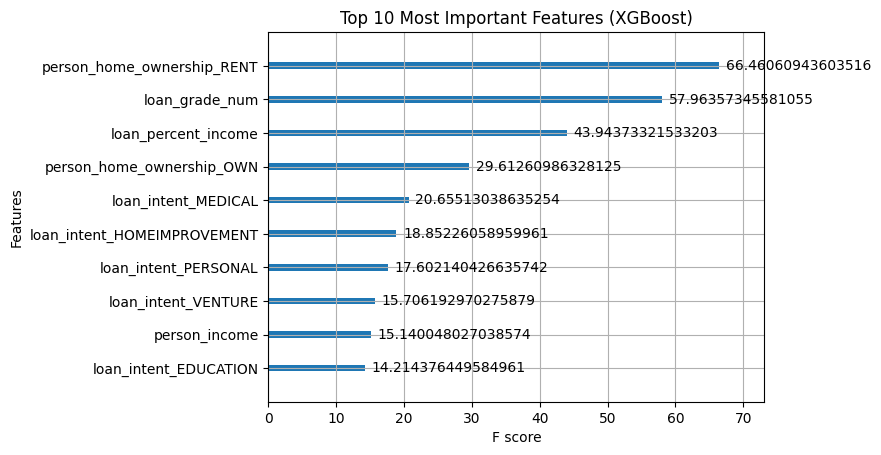

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Most Important Features (XGBoost)")
plt.show()


# 🛠️ Step-by-Step: SHAP + LIME for XGBoost Model


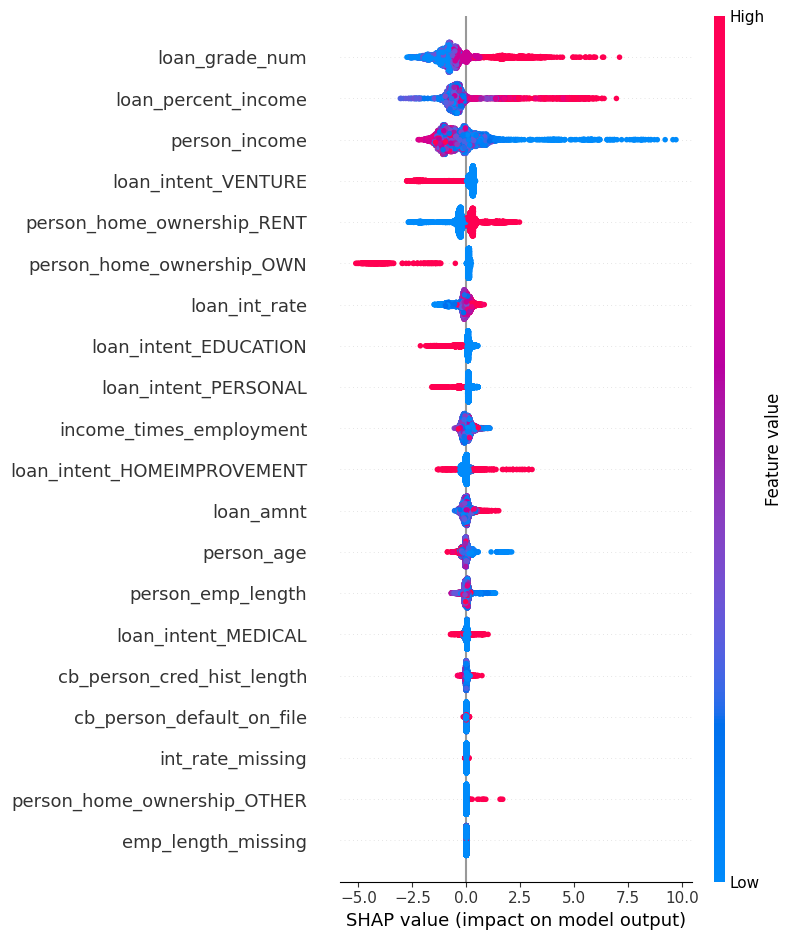

In [55]:
import shap

# Create TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_model)

# Get SHAP values for test data
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test)
# Pick an individual prediction (e.g., first row of test set)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


# ✅ PART 2: LIME (Local Model-Agnostic Explanation)

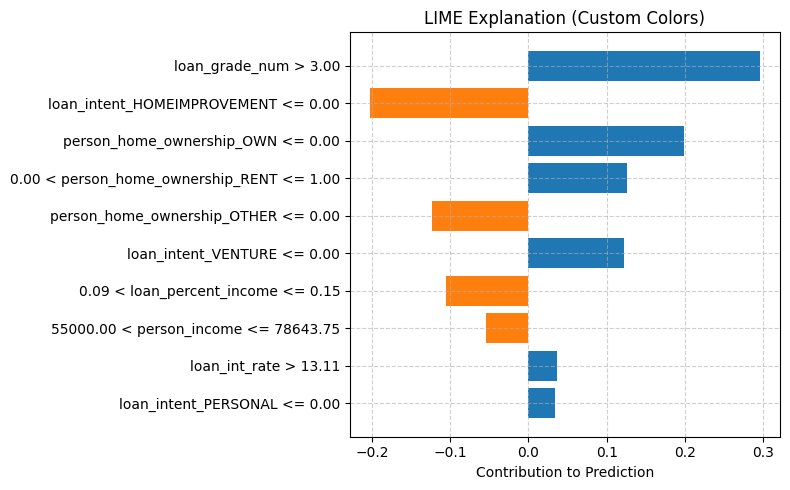

In [58]:
# Step 1: Install LIME (if not already)
# !pip install lime

# Step 2: Import LIME
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Initialize the LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.tolist(),
    class_names=['Not Default', 'Default'],
    mode='classification'
)

# Step 4: Choose a test row to explain (e.g., first one)
i = 0
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=best_model.predict_proba
)

# Step 5: Extract explanation and plot with custom colors
explanation = exp.as_list()
feature_names, weights = zip(*explanation)

# Use blue for positive weights (default push), orange for negative (non-default)
colors = ['#1f77b4' if w > 0 else '#ff7f0e' for w in weights]

# Custom plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, weights, color=colors)
plt.xlabel("Contribution to Prediction")
plt.title("LIME Explanation (Custom Colors)")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 💾 Step 1: Save the Trained & Tuned Model

In [59]:
import joblib

# Save the best model
joblib.dump(best_model, 'credit_risk_xgboost_model.pkl')
# Load saved model
loaded_model = joblib.load('credit_risk_xgboost_model.pkl')

# Predict using the loaded model
pred = loaded_model.predict(X_test)


# 📚 Credit Risk Prediction Project – Detailed Summary

## 🧠 Project Objective
The goal of this project is to build a machine learning pipeline to predict whether a loan applicant is likely to default. By analyzing financial and demographic data, the system flags risky borrowers to help lenders make informed decisions. This is a typical classification problem often encountered in financial risk modeling.

---

## 📁 Dataset Overview
- **Source**: Credit risk dataset containing borrower information.
- **Features**:
  - `person_age`, `person_income`, `person_emp_length`
  - `loan_amnt`, `loan_int_rate`, `loan_intent`, `loan_grade`
  - `cb_person_cred_hist_length`, `cb_person_default_on_file`, etc.
- **Target**: `loan_status` → 0 (no default) or 1 (default)

---

## 🧹 1. Data Cleaning

- **Missing Values**:
  - `loan_int_rate`: filled with median + added flag `int_rate_missing`
  - `person_emp_length`: filled with -1 + added flag `emp_length_missing`

- **Inconsistent Values**:
  - `person_age`: capped at 100
  - `person_emp_length`: capped at 50

- **Duplicates**:
  - 165 duplicate rows removed using `drop_duplicates()`

- **Outliers**:
  - Clipped using IQR method for features like income, loan amount, interest rate, age, etc.

---

## 🛠️ 2. Feature Engineering

- Created `loan_percent_income` = `loan_amnt / person_income`
- Created interaction feature `income_times_employment`
- Converted `loan_grade` into `loan_grade_num` (A→1 to G→7)
- One-hot encoding for `loan_intent`, `person_home_ownership`
- Created missing flags for emp length and int rate

---

## 📊 3. Exploratory Data Analysis (EDA)

- **Univariate Analysis**: Countplots, histograms
- **Bivariate Analysis**: Boxplots, target vs feature plots
- **Correlation Heatmap**:
  - Found strong positive correlation between `loan_percent_income` and `loan_status`
  - `loan_int_rate` and `person_income` also showed significant relationship with target

---

## 🤖 4. Model Building & Evaluation

- **Models Tried**:
  - Logistic Regression (baseline)
  - Random Forest
  - XGBoost

- **Evaluation Metrics**:
  - Confusion matrix, Precision, Recall, F1-Score
  - ROC-AUC Score

- **Final Model**: Tuned **XGBoost Classifier**
  - Hyperparameter tuning with `RandomizedSearchCV`
  - ROC-AUC Score = **0.95**
  - F1-Score (Class 1 – default) = **0.84**

---

## 🧠 5. Model Explainability

- **SHAP (Global + Local)**:
  - Summary plot: top features like `loan_grade_num`, `loan_percent_income`, `loan_int_rate`
  - Force plots for individual explanations

- **LIME (Local Interpretability)**:
  - Visual explanation of single predictions
  - Custom bar chart with positive/negative feature impact

---

## 💾 6. Model Deployment – Streamlit App

- Built interactive frontend using **Streamlit**
- Input form: user enters borrower data
- Model prediction shown as default / not default
- Handled feature order issue using `model.feature_names_in_`

---

## 📦 Project Deliverables

- Trained model: `credit_risk_xgboost_model.pkl`
- Streamlit App: `app.py`
- Requirements: `requirements.txt`
- Readme: `README.md`
- SHAP & LIME explanation scripts

---

## ✅ Final Takeaways

- End-to-end ML pipeline for a real-world finance problem
- Strong performance using XGBoost with explainability
- Fully functional app ready for deployment

This project demonstrates not just predictive modeling, but also how to interpret and deploy machine learning models in production-ready formats.